# 1.Import Necessary Libraries

In [1]:
# ================================================
# Install Required Libraries
# ================================================
!pip install --upgrade scikit-learn==1.3.0 scikeras xgboost tensorflow keras-tuner imbalanced-learn

# ================================================
# Import Libraries
# ================================================

# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# SciKeras wrapper
from scikeras.wrappers import KerasClassifier

# Model evaluation and utilities
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_curve, roc_auc_score, roc_curve, auc, f1_score
)
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Hyperparameter tuning
import keras_tuner as kt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Saving models
import joblib
import os

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("Imports completed")


INFO: pip is looking at multiple versions of scikeras to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of imbalanced-learn to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
  Attempting uninstall: tensorflo

# 2.Load and Inspect the Dataset

In [2]:
# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/Asteroid Collision Dataset V2.csv'
df = pd.read_csv(file_path, low_memory=False)

# Inspect the dataset
print("Dataset Shape:", df.shape)
print("First 5 Rows:\n", df.head())


Mounted at /content/drive
Dataset Shape: (677494, 79)
First 5 Rows:
    diameter  extent  albedo  rot_per  GM  BV  UB  IR spec_B  spec_T  ...  \
0       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
1       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
2       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
3       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
4       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   

        rms  two_body  A1  A1_sigma  A2  A2_sigma  A3  A3_sigma  DT  DT_sigma  
0  0.000533       NaN NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
1  0.071263       NaN NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
2  0.000002       NaN NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
3       NaN         T NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
4  0.339380       NaN NaN       NaN NaN       NaN NaN       NaN NaN       

# 3.Initial EDA


--- Initial EDA (Before Preprocessing) ---

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677494 entries, 0 to 677493
Data columns (total 79 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   diameter        6866 non-null    float64
 1   extent          0 non-null       float64
 2   albedo          6500 non-null    float64
 3   rot_per         1347 non-null    float64
 4   GM              0 non-null       float64
 5   BV              0 non-null       float64
 6   UB              0 non-null       float64
 7   IR              0 non-null       float64
 8   spec_B          50 non-null      object 
 9   spec_T          0 non-null       float64
 10  full_name       677494 non-null  object 
 11  a               677494 non-null  float64
 12  e               677494 non-null  float64
 13  i               677494 non-null  float64
 14  om              677494 non-null  float64
 15  w               677494 non-null  float64


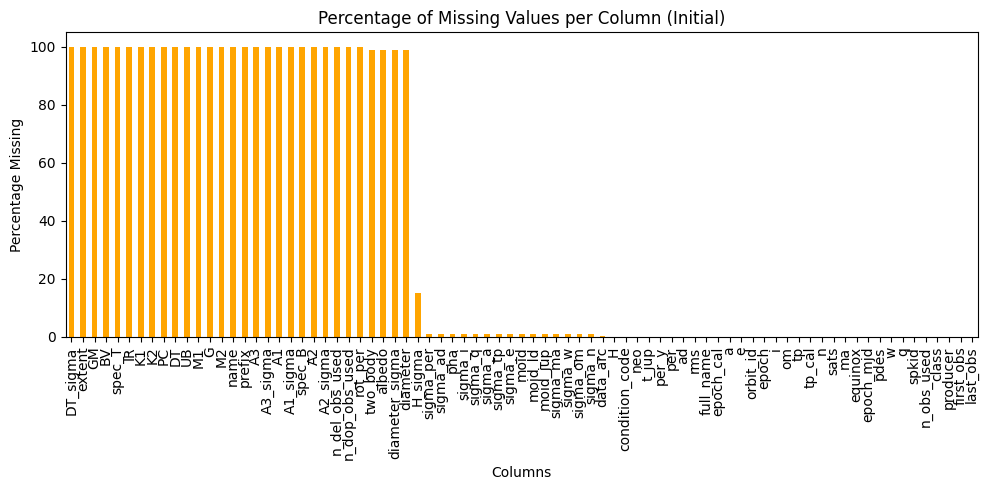

In [3]:
print("\n--- Initial EDA (Before Preprocessing) ---")
# Basic Info
print("\nDataframe Info:")
df.info()

# Statistical Summary
print("\nStatistical Summary of Numeric Columns:")
print(df.describe(include=[np.number]))

# Check missing values again visually
missing_summary = df.isnull().mean().sort_values(ascending=False)*100
print("\nMissing Data Summary (Percentage of Missing Values):\n", missing_summary)

# Plot Missing Values
plt.figure(figsize=(10,5))
missing_summary.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values per Column (Initial)')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.tight_layout()
plt.show()

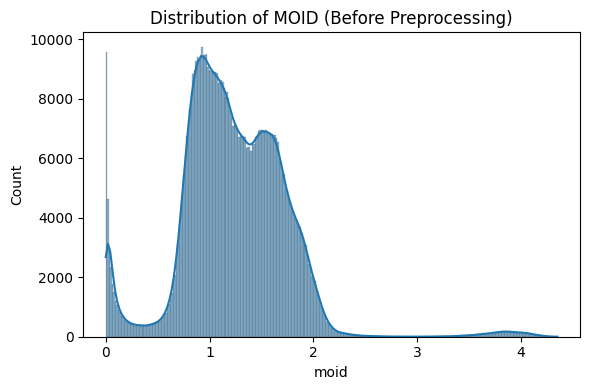

In [4]:
# Distribution of MOID (Before Preprocessing)
if 'moid' in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df['moid'], kde=True)
    plt.title('Distribution of MOID (Before Preprocessing)')
    plt.tight_layout()
    plt.show()

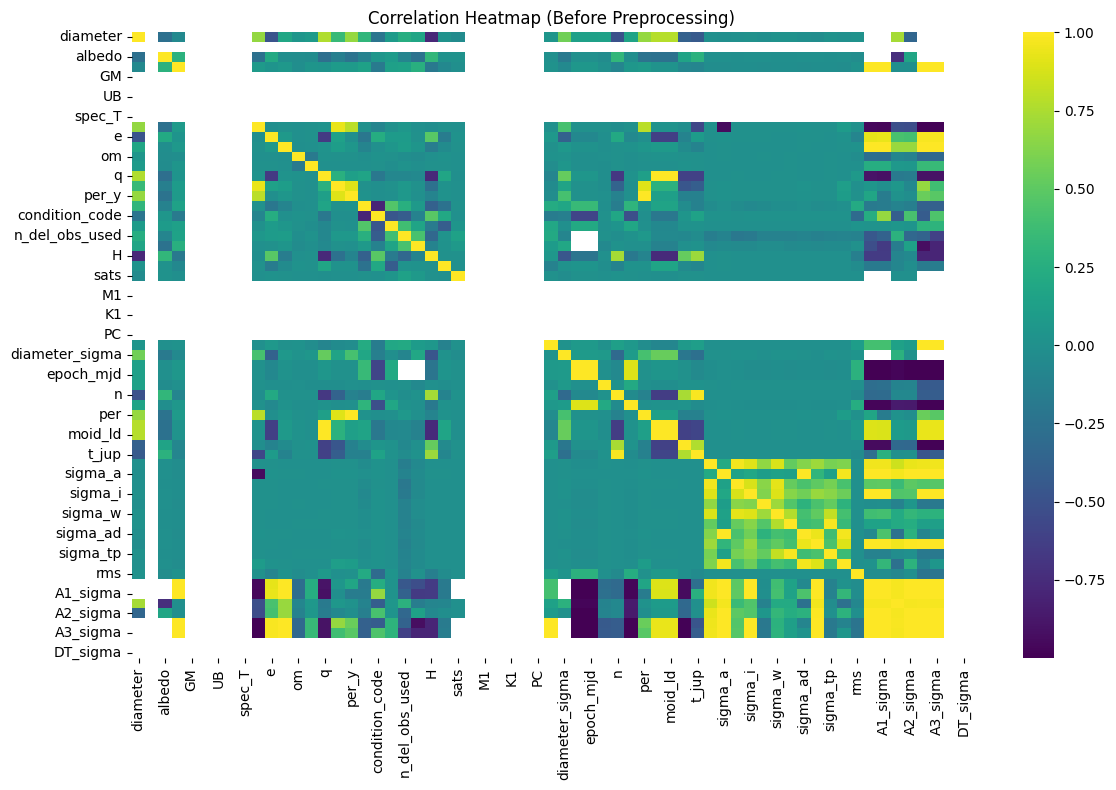

In [5]:
# Correlation Heatmap (Initial)
numeric_cols_initial = df.select_dtypes(include=[np.number]).columns
corr_initial = df[numeric_cols_initial].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_initial, annot=False, cmap='viridis')
plt.title('Correlation Heatmap (Before Preprocessing)')
plt.tight_layout()
plt.show()

# 4.Data Preprocessing

## 4.1. Handle Missing Data

In [6]:
# Analyze missing data
missing_summary = df.isnull().mean().sort_values(ascending=False) * 100
missing_summary = missing_summary[missing_summary > 0]
print("\nMissing Data Summary (Percentage of Missing Values):")
print(missing_summary)

# Drop columns with >90% missing values or irrelevant
cols_to_drop_missing = missing_summary[missing_summary > 90].index.tolist()
irrelevant_columns = ['producer', 'equinox', 'orbit_id', 'pdes', 'full_name', 'name', 'prefix']
cols_to_drop = list(set(cols_to_drop_missing + irrelevant_columns))

cols_to_drop = [col for col in cols_to_drop if col in df.columns]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print("\nDropped Columns:")
print(cols_to_drop)


Missing Data Summary (Percentage of Missing Values):
DT_sigma          100.000000
extent            100.000000
GM                100.000000
BV                100.000000
spec_T            100.000000
IR                100.000000
K1                100.000000
K2                100.000000
PC                100.000000
DT                100.000000
UB                100.000000
M1                100.000000
G                 100.000000
M2                100.000000
name               99.999852
prefix             99.999410
A3                 99.998967
A3_sigma           99.998967
A1                 99.997491
A1_sigma           99.997491
spec_B             99.992620
A2                 99.976531
A2_sigma           99.976531
n_del_obs_used     99.910700
n_dop_obs_used     99.910700
rot_per            99.801179
two_body           99.062427
albedo             99.040582
diameter_sigma     98.987002
diameter           98.986559
H_sigma            15.064635
sigma_per           0.937868
sigma_ad          

## 4.2. Impute missing values in numeric columns

In [7]:
# Impute missing values in numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

## 4.3. Map Binary Columns

In [8]:
# Map 'Y'/'N' to 1/0 in binary columns
binary_mapping = {'Y': 1, 'N': 0}
for col in ['neo', 'pha']:
    if col in df.columns:
        df[col] = df[col].map(binary_mapping)

## 4.4. Handle Date Columns

In [9]:
# Convert date columns to datetime and extract year, month, day
date_cols = ['epoch_cal', 'tp_cal', 'first_obs', 'last_obs']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce', format='%Y-%m-%d')
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df.drop(columns=[col], inplace=True)

In [10]:
df.shape

(677494, 52)

## 4.5. One-Hot Encode Categorical Columns

In [11]:
# Identify remaining categorical columns
remaining_categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nRemaining Categorical Columns after Date conversion:", remaining_categorical_cols)

# One-hot encode the 'class' column if it exists
if 'class' in df.columns:
    df = pd.get_dummies(df, columns=['class'], prefix='class', drop_first=True)


Remaining Categorical Columns after Date conversion: ['class']


# 5.Feature Engineering

## 5.1. Add Derived Features

In [12]:
GRAVITATIONAL_CONSTANT = 39.478  # AU^3 / yr^2

# Add derived features
df['relative_orbital_distance'] = np.abs(df['q'] - df['a'] * (1 - df['e']))
df['orbital_velocity'] = np.sqrt(GRAVITATIONAL_CONSTANT / df['a'])
df['adjusted_eccentricity'] = df['e'] * df['a'] / df['q']

## 5.2. Add Perturbed Features

In [13]:
# Perturb orbital elements based on their uncertainties
for col in ['a', 'e', 'q', 'i']:
    sigma_col = f'sigma_{col}'
    if sigma_col in df.columns:
        df[f'{col}_perturbed'] = df[col] + np.random.normal(0, df[sigma_col])

## 5.3. Create Target Variable

In [14]:
# Create 'collision_risk' based on 'moid' (Minimum Orbit Intersection Distance)
df['collision_risk'] = np.where(df['moid'] < 0.05, 1, 0)

# Drop 'moid' and 'moid_ld' from features
features_to_drop = ['moid', 'moid_ld']
df.drop(columns=features_to_drop, inplace=True, errors='ignore')

# 6.Prepare Data for Modeling

## 6.1. Define Features and Target

In [15]:
# Define features and target variable
X = df.drop(columns=['collision_risk'])
y = df['collision_risk']

# Ensure only numeric features are used
X = X.select_dtypes(include=[np.number])

## 6.2. Split the Dataset

In [16]:
# Split the dataset with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 6.3. Handle Missing Values in Training and Testing Sets

In [17]:
# Identify columns with all missing values and drop them
all_missing_cols = X_train.columns[X_train.isnull().all()]
print("Columns with all missing values:", all_missing_cols.tolist())

X_train.drop(columns=all_missing_cols, inplace=True)
X_test.drop(columns=all_missing_cols, inplace=True)

# Re-impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Verify no missing values remain
print("Missing Values in X_train:", X_train.isnull().sum().sum())
print("Missing Values in X_test:", X_test.isnull().sum().sum())

Columns with all missing values: ['epoch_cal_year', 'epoch_cal_month', 'epoch_cal_day', 'tp_cal_year', 'tp_cal_month', 'tp_cal_day']
Missing Values in X_train: 0
Missing Values in X_test: 0


## 6.4. Handle Class Imbalance with SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled Training Set Shape:", X_train_resampled.shape)
print("Class Distribution After Resampling:\n", y_train_resampled.value_counts())

Resampled Training Set Shape: (1054508, 50)
Class Distribution After Resampling:
 collision_risk
0    527254
1    527254
Name: count, dtype: int64


In [19]:
print("Missing Values in the Entire Dataset:\n", df.isnull().sum())

Missing Values in the Entire Dataset:
 a                 0
e                 0
i                 0
om                0
w                 0
                 ..
a_perturbed       0
e_perturbed       0
q_perturbed       0
i_perturbed       0
collision_risk    0
Length: 66, dtype: int64


## 6.5. Data Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# 7.Secondary EDA


--- Secondary EDA (After Preprocessing) ---
Post-Preprocessing X_train_resampled_scaled shape: (1054508, 50)
Class Distribution in y_train_resampled:
 collision_risk
0    527254
1    527254
Name: count, dtype: int64


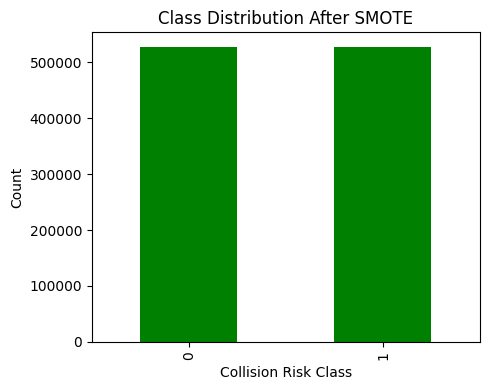

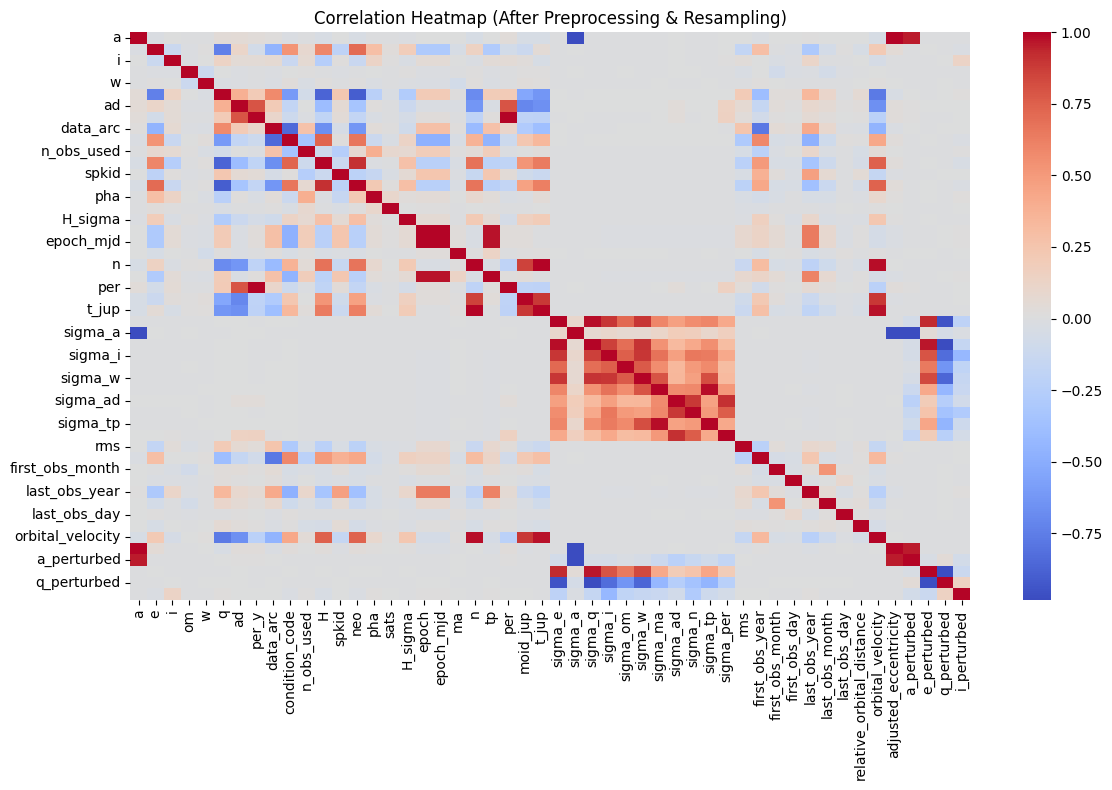

In [21]:
print("\n--- Secondary EDA (After Preprocessing) ---")

# Check the shape and distribution again
print("Post-Preprocessing X_train_resampled_scaled shape:", X_train_resampled_scaled.shape)
print("Class Distribution in y_train_resampled:\n", y_train_resampled.value_counts())

# Plot class distribution after SMOTE
plt.figure(figsize=(5,4))
y_train_resampled.value_counts().plot(kind='bar', color='green')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Collision Risk Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Correlation heatmap after preprocessing (use the X_train after imputation/dropping)
X_train_post = pd.DataFrame(X_train_resampled_scaled, columns=X_train.columns)
corr_post = pd.DataFrame(X_train_post, columns=X_train.columns).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_post, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap (After Preprocessing & Resampling)')
plt.tight_layout()
plt.show()

# 8.Model Training and Evaluation

## 8.1 Random Forest Classifier

### 8.1.1 Define Random Forest Parameters

In [22]:
# Import Necessary Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, precision_recall_curve, auc, f1_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize Random Forest parameters
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'class_weight': 'balanced',
    'random_state': 42,
    'n_jobs': -1
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(**rf_params)


### 8.1.2 Cross-Validation

In [23]:
# Initialize Cross-Validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Metrics to track
roc_auc_scores = []
pr_auc_scores = []
f1_scores = []
fold = 1

# Subsection 2.2: Perform Cross-Validation
for train_index, val_index in skf.split(X_train_resampled_scaled, y_train_resampled):
    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_resampled_scaled[train_index], X_train_resampled_scaled[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

    # Train Random Forest model
    rf_model.fit(X_train_fold, y_train_fold)

    # Predict on validation fold
    y_val_pred_proba = rf_model.predict_proba(X_val_fold)[:, 1]
    y_val_pred = rf_model.predict(X_val_fold)

    # Calculate metrics
    roc_auc = roc_auc_score(y_val_fold, y_val_pred_proba)
    precision, recall, _ = precision_recall_curve(y_val_fold, y_val_pred_proba)
    pr_auc = auc(recall, precision)
    f1 = f1_score(y_val_fold, y_val_pred)

    # Append metrics
    roc_auc_scores.append(roc_auc)
    pr_auc_scores.append(pr_auc)
    f1_scores.append(f1)

    # Print fold results
    print(f"Fold {fold}: ROC-AUC = {roc_auc:.4f}, PR-AUC = {pr_auc:.4f}, F1-Score = {f1:.4f}")
    fold += 1

# Subsection 2.3: Aggregate Cross-Validation Results
print("\n--- Cross-Validation Results ---")
print(f"Mean ROC-AUC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")
print(f"Mean PR-AUC: {np.mean(pr_auc_scores):.4f} ± {np.std(pr_auc_scores):.4f}")
print(f"Mean F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

Fold 1: ROC-AUC = 0.9995, PR-AUC = 0.9994, F1-Score = 0.9957
Fold 2: ROC-AUC = 0.9995, PR-AUC = 0.9993, F1-Score = 0.9956
Fold 3: ROC-AUC = 0.9995, PR-AUC = 0.9994, F1-Score = 0.9956
Fold 4: ROC-AUC = 0.9995, PR-AUC = 0.9994, F1-Score = 0.9956
Fold 5: ROC-AUC = 0.9995, PR-AUC = 0.9994, F1-Score = 0.9955

--- Cross-Validation Results ---
Mean ROC-AUC: 0.9995 ± 0.0000
Mean PR-AUC: 0.9994 ± 0.0000
Mean F1-Score: 0.9956 ± 0.0001


### 8.1.3 Model Training and Evaluation

In [24]:
#Train Model on Full Training Data
rf_model.fit(X_train_resampled_scaled, y_train_resampled)

# Subsection 3.2: Predict on Training and Test Sets
y_train_pred = rf_model.predict(X_train_resampled_scaled)
y_train_pred_proba = rf_model.predict_proba(X_train_resampled_scaled)[:, 1]

y_test_pred = rf_model.predict(X_test_scaled)
y_test_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Subsection 3.3: Evaluate Training and Test Set Performance
print("\n--- Training Set Evaluation ---")
print("Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred, digits=4))

roc_auc_train = roc_auc_score(y_train_resampled, y_train_pred_proba)
print(f"Training ROC-AUC: {roc_auc_train:.4f}")

print("\n--- Test Set Evaluation ---")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
print(f"Test ROC-AUC: {roc_auc_test:.4f}")


--- Training Set Evaluation ---
Training Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9919    0.9959    527254
           1     0.9920    1.0000    0.9960    527254

    accuracy                         0.9960   1054508
   macro avg     0.9960    0.9960    0.9960   1054508
weighted avg     0.9960    0.9960    0.9960   1054508

Training ROC-AUC: 0.9996

--- Test Set Evaluation ---
Test Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9914    0.9956    131814
           1     0.7636    0.9965    0.8646      3685

    accuracy                         0.9915    135499
   macro avg     0.8817    0.9939    0.9301    135499
weighted avg     0.9935    0.9915    0.9921    135499

Test ROC-AUC: 0.9989


### 8.1.4 Error Analysis


--- Error Analysis ---
Misclassified Samples Count: 1150
Misclassified Samples Proportion: 0.008487147506623665

Top Features Contributing to Misclassifications:
             Feature  Importance
5                  q    0.195262
13               neo    0.180409
48       q_perturbed    0.172700
11                 H    0.082627
20                 n    0.049213
7              per_y    0.047901
44  orbital_velocity    0.040245
47       e_perturbed    0.033261
46       a_perturbed    0.032212
22               per    0.031885


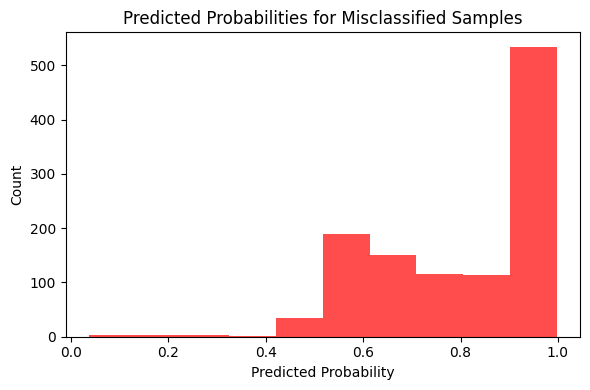

In [25]:
# Identify Misclassified Samples (Test Set)
test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Predicted_Prob': y_test_pred_proba
})
test_results['Misclassified'] = test_results['Actual'] != test_results['Predicted']

print("\n--- Error Analysis ---")
print("Misclassified Samples Count:", test_results['Misclassified'].sum())
print("Misclassified Samples Proportion:", test_results['Misclassified'].mean())

#Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features Contributing to Misclassifications:")
print(feature_importance.head(10))

#Visualize Misclassifications
misclassified_samples = test_results[test_results['Misclassified']]
plt.figure(figsize=(6, 4))
plt.hist(misclassified_samples['Predicted_Prob'], bins=10, color='red', alpha=0.7)
plt.title('Predicted Probabilities for Misclassified Samples')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### 8.1.5 Visualizations

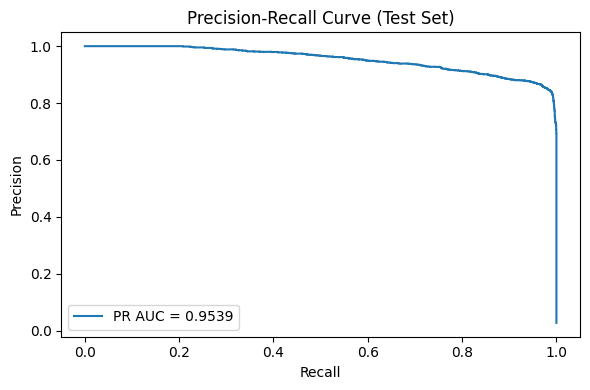

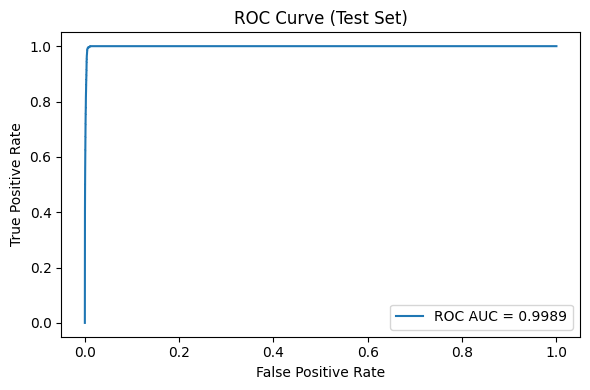

In [26]:
#Plot Precision-Recall Curve (Test Set)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_proba)
pr_auc_test = auc(recall_test, precision_test)

plt.figure(figsize=(6, 4))
plt.plot(recall_test, precision_test, label=f'PR AUC = {pr_auc_test:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

#Plot ROC Curve (Test Set)
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_test:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

## 8.2 Gradient Boosting Classifier (XGBoost)

### 8.2.1 Prepare Data for XGBoost

In [27]:
"""# Import Necessary Libraries
import xgboost as xgb
from sklearn.metrics import (
    roc_auc_score, precision_recall_curve, auc, f1_score, classification_report, confusion_matrix
)
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert training and testing sets to DMatrix format
dtrain = xgb.DMatrix(X_train_resampled_scaled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define XGBoost parameters (default values, can be tuned)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 200,
    'random_state': 42
}"""

"# Import Necessary Libraries\nimport xgboost as xgb\nfrom sklearn.metrics import (\n    roc_auc_score, precision_recall_curve, auc, f1_score, classification_report, confusion_matrix\n)\nfrom sklearn.model_selection import StratifiedKFold\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport pandas as pd\n\n# Convert training and testing sets to DMatrix format\ndtrain = xgb.DMatrix(X_train_resampled_scaled, label=y_train_resampled)\ndtest = xgb.DMatrix(X_test_scaled, label=y_test)\n\n# Define XGBoost parameters (default values, can be tuned)\nparams = {\n    'objective': 'binary:logistic',\n    'eval_metric': 'logloss',\n    'max_depth': 5,\n    'learning_rate': 0.1,\n    'subsample': 0.8,\n    'colsample_bytree': 0.8,\n    'n_estimators': 200,\n    'random_state': 42\n}"

In [28]:
!pip install --upgrade xgboost

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, precision_recall_curve, auc, f1_score
)
from sklearn.model_selection import StratifiedKFold

# Initialize XGBoost model (no early stopping)
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss",
    use_label_encoder=False
)


### 8.2.2 Cross-Validation

In [30]:
# Initialize Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Metrics to track
roc_auc_scores = []
pr_auc_scores = []
f1_scores = []
fold = 1

# Perform Cross-Validation
for train_index, val_index in skf.split(X_train_resampled_scaled, y_train_resampled):
    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_resampled_scaled[train_index], X_train_resampled_scaled[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

    # Train the model on the current fold (no early stopping)
    xgb_model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)

    # Predict on validation fold
    y_val_pred_proba = xgb_model.predict_proba(X_val_fold)[:, 1]
    y_val_pred = xgb_model.predict(X_val_fold)

    # Calculate metrics
    roc_auc = roc_auc_score(y_val_fold, y_val_pred_proba)
    precision, recall, _ = precision_recall_curve(y_val_fold, y_val_pred_proba)
    pr_auc = auc(recall, precision)
    f1 = f1_score(y_val_fold, y_val_pred)

    # Append metrics
    roc_auc_scores.append(roc_auc)
    pr_auc_scores.append(pr_auc)
    f1_scores.append(f1)

    # Print fold results
    print(f"Fold {fold}: ROC-AUC = {roc_auc:.4f}, PR-AUC = {pr_auc:.4f}, F1-Score = {f1:.4f}")
    fold += 1

# Aggregate Cross-Validation Results
print("\n--- Cross-Validation Results ---")
print(f"Mean ROC-AUC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")
print(f"Mean PR-AUC: {np.mean(pr_auc_scores):.4f} ± {np.std(pr_auc_scores):.4f}")
print(f"Mean F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

Fold 1: ROC-AUC = 0.9999, PR-AUC = 0.9999, F1-Score = 0.9974
Fold 2: ROC-AUC = 0.9999, PR-AUC = 0.9999, F1-Score = 0.9975
Fold 3: ROC-AUC = 0.9999, PR-AUC = 0.9999, F1-Score = 0.9976
Fold 4: ROC-AUC = 0.9999, PR-AUC = 0.9999, F1-Score = 0.9976
Fold 5: ROC-AUC = 0.9999, PR-AUC = 0.9999, F1-Score = 0.9976

--- Cross-Validation Results ---
Mean ROC-AUC: 0.9999 ± 0.0000
Mean PR-AUC: 0.9999 ± 0.0000
Mean F1-Score: 0.9975 ± 0.0001


### 8.2.3 Model Training and Evaluation

In [31]:
# Train Final Model on Full Training Data
xgb_model.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on Training and Test Sets
y_train_pred_proba = xgb_model.predict_proba(X_train_resampled_scaled)[:, 1]
y_train_pred = xgb_model.predict(X_train_resampled_scaled)

y_test_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluate Training Set Performance
print("\n--- Training Set Evaluation ---")
print("Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred, digits=4))

roc_auc_train = roc_auc_score(y_train_resampled, y_train_pred_proba)
print(f"Training ROC-AUC: {roc_auc_train:.4f}")

# Evaluate Test Set Performance
print("\n--- Test Set Evaluation ---")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
print(f"Test ROC-AUC: {roc_auc_test:.4f}")


--- Training Set Evaluation ---
Training Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9957    0.9977    527254
           1     0.9957    0.9997    0.9977    527254

    accuracy                         0.9977   1054508
   macro avg     0.9977    0.9977    0.9977   1054508
weighted avg     0.9977    0.9977    0.9977   1054508

Training ROC-AUC: 1.0000

--- Test Set Evaluation ---
Test Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9953    0.9975    131814
           1     0.8547    0.9897    0.9173      3685

    accuracy                         0.9951    135499
   macro avg     0.9272    0.9925    0.9574    135499
weighted avg     0.9958    0.9951    0.9953    135499

Test ROC-AUC: 0.9996


### 8.2.4 Error Analysis


--- Error Analysis ---
Misclassified Samples Count: 658
Misclassified Samples Proportion: 0.004856124399442063

Top Features (Native Booster):
                      Feature  Importance
11                          H       252.0
5                           q       183.0
43  relative_orbital_distance       138.0
48                q_perturbed       120.0
9              condition_code        98.0
41             last_obs_month        96.0
14                        pha        84.0
38            first_obs_month        79.0
4                           w        69.0
10                 n_obs_used        64.0


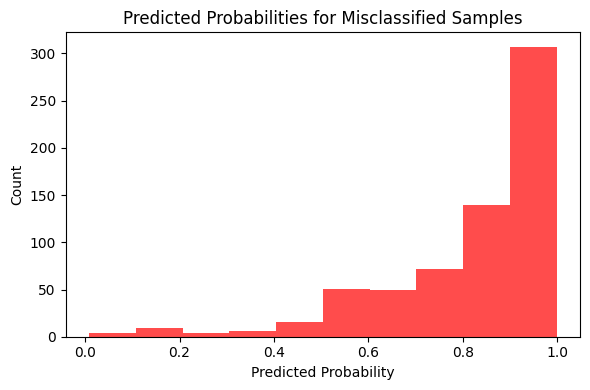

In [32]:
# Identify Misclassified Samples (Test Set)
test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Predicted_Prob': y_test_pred_proba
})
test_results['Misclassified'] = test_results['Actual'] != test_results['Predicted']

print("\n--- Error Analysis ---")
print("Misclassified Samples Count:", test_results['Misclassified'].sum())
print("Misclassified Samples Proportion:", test_results['Misclassified'].mean())

# Feature Importance Analysis

# Retrieve the underlying booster
booster = xgb_model.get_booster()

# Get feature importance from the booster using the "weight" metric
feature_importance_dict = booster.get_score(importance_type='weight')

# Map feature importance keys (f0, f1, ...) to actual column names
feature_names = [f"f{i}" for i in range(X_train.shape[1])]

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': [feature_importance_dict.get(f, 0) for f in feature_names]  # default to 0 if key not in dict
}).sort_values(by='Importance', ascending=False)

print("\nTop Features (Native Booster):")
print(feature_importance.head(10))



# Visualize Misclassifications
misclassified_samples = test_results[test_results['Misclassified']]
plt.figure(figsize=(6, 4))
plt.hist(misclassified_samples['Predicted_Prob'], bins=10, color='red', alpha=0.7)
plt.title('Predicted Probabilities for Misclassified Samples')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 8.2.5 Visualizations

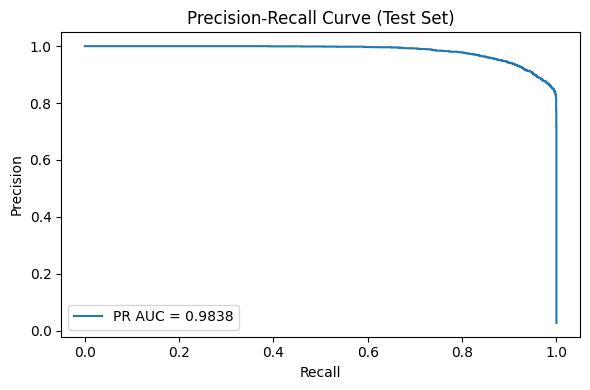

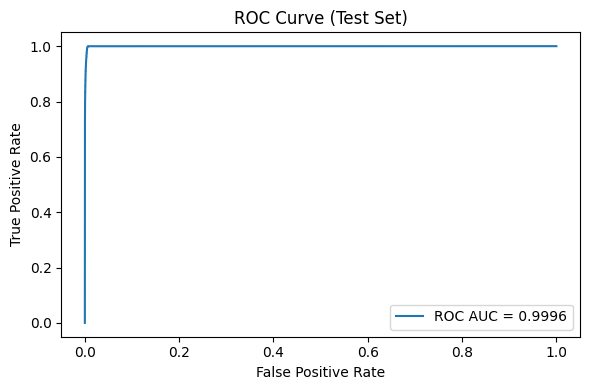

In [33]:
# Plot Precision-Recall Curve (Test Set)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_proba)
pr_auc_test = auc(recall_test, precision_test)

plt.figure(figsize=(6, 4))
plt.plot(recall_test, precision_test, label=f'PR AUC = {pr_auc_test:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot ROC Curve (Test Set)
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_test:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()


## 8.3Neural Network (Dense Model)

### 8.3.1 Define Dense Neural Network Model

In [39]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scikeras.wrappers import KerasClassifier

# ================================================
# Section 1: Define Dense Neural Network Model
# ================================================

def create_dense_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),
        Dropout(0.2),

        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# ================================================
# Section 2: Wrap and Train the Model (No Early Stopping)
# ================================================

# Wrap the Keras Model for Compatibility with scikit-learn
keras_sklearn_model = KerasClassifier(
    model=create_dense_model,
    model__input_dim=X_train_resampled_scaled.shape[1],
    epochs=20,
    batch_size=32,
    verbose=1
)

# Train the Model (No Early Stopping)
history = keras_sklearn_model.fit(
    X_train_resampled_scaled,
    y_train_resampled,
    validation_split=0.2
)

KeyboardInterrupt: 

### 8.3.2 Model Evaluation

In [ ]:
# Predict on Training and Test Sets
y_train_pred_proba = keras_sklearn_model.predict_proba(X_train_resampled_scaled)[:, 1]
y_train_pred = (y_train_pred_proba > 0.5).astype(int)

y_test_pred_proba = keras_sklearn_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Evaluate Training Set Performance
print("\n--- Training Set Evaluation ---")
print("Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred, digits=4))

roc_auc_train = roc_auc_score(y_train_resampled, y_train_pred_proba)
print(f"Training ROC-AUC: {roc_auc_train:.4f}")

# Evaluate Test Set Performance
print("\n--- Test Set Evaluation ---")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
print(f"Test ROC-AUC: {roc_auc_test:.4f}")

# Confusion Matrix
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

### 8.3.3 Visualizations

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history_['loss'], label='Training Loss')
plt.plot(history.history_['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history_['accuracy'], label='Training Accuracy')
plt.plot(history.history_['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve: Dense Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
pr_auc_test = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc_test:.4f})')
plt.title('Precision-Recall Curve: Dense Neural Network')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

# 9.Evaluation and Comparison of Models

In [ ]:
# Initialize a DataFrame to store model performance
evaluation_results = pd.DataFrame(columns=[
    'Model', 'Dataset', 'ROC-AUC', 'PR-AUC', 'F1-Score', 'Accuracy'
])

### 9.1 Random Forest Evaluation

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#Calculate Metrics for Train
f1_rf_train = f1_score(y_train_resampled, y_train_pred)
precision_rf_train, recall_rf_train, _ = precision_recall_curve(y_train_resampled, y_train_pred_proba)
pr_auc_rf_train = auc(recall_rf_train, precision_rf_train)
accuracy_rf_train = accuracy_score(y_train_resampled, y_train_pred)

#Calculate Metrics for Test
y_test_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
precision_rf_test, recall_rf_test, _ = precision_recall_curve(y_test, y_test_pred_proba_rf)
pr_auc_rf_test = auc(recall_rf_test, precision_rf_test)
f1_rf_test = f1_score(y_test, (y_test_pred_proba_rf > 0.5).astype(int))
accuracy_rf_test = accuracy_score(y_test, (y_test_pred_proba_rf > 0.5).astype(int))

# Add training results to the DataFrame
new_row = pd.DataFrame([{
    'Model': 'Random Forest',
    'Dataset': 'Training',
    'ROC-AUC': roc_auc_train,
    'PR-AUC': pr_auc_rf_train,
    'F1-Score': f1_rf_train,
    'Accuracy': accuracy_rf_train
}])
evaluation_results = pd.concat([evaluation_results, new_row], ignore_index=True)

# Add testing results to the DataFrame
new_row = pd.DataFrame([{
    'Model': 'Random Forest',
    'Dataset': 'Testing',
    'ROC-AUC': roc_auc_test,
    'PR-AUC': pr_auc_rf_test,
    'F1-Score': f1_rf_test,
    'Accuracy': accuracy_rf_test
}])
evaluation_results = pd.concat([evaluation_results, new_row], ignore_index=True)


## 9.2 XGBoost Evaluation

In [ ]:
# Compute predictions for the training set with XGBClassifier
y_train_pred_proba_xgb = xgb_model.predict_proba(X_train_resampled_scaled)[:, 1]
y_train_pred_xgb = xgb_model.predict(X_train_resampled_scaled)

# Compute Training Metrics
roc_auc_xgb_train = roc_auc_score(y_train_resampled, y_train_pred_proba_xgb)
precision_xgb_train, recall_xgb_train, _ = precision_recall_curve(y_train_resampled, y_train_pred_proba_xgb)
pr_auc_xgb_train = auc(recall_xgb_train, precision_xgb_train)
f1_xgb_train = f1_score(y_train_resampled, y_train_pred_xgb)
accuracy_xgb_train = accuracy_score(y_train_resampled, y_train_pred_xgb)

# Compute predictions for the testing set with XGBClassifier
y_test_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Compute Testing Metrics
roc_auc_xgb_test = roc_auc_score(y_test, y_test_pred_proba_xgb)
precision_xgb_test, recall_xgb_test, _ = precision_recall_curve(y_test, y_test_pred_proba_xgb)
pr_auc_xgb_test = auc(recall_xgb_test, precision_xgb_test)
f1_xgb_test = f1_score(y_test, y_test_pred_xgb)
accuracy_xgb_test = accuracy_score(y_test, y_test_pred_xgb)

# Add training results to the DataFrame
new_row_training = pd.DataFrame([{
    'Model': 'XGBoost',
    'Dataset': 'Training',
    'ROC-AUC': roc_auc_xgb_train,
    'PR-AUC': pr_auc_xgb_train,
    'F1-Score': f1_xgb_train,
    'Accuracy': accuracy_xgb_train
}])
evaluation_results = pd.concat([evaluation_results, new_row_training], ignore_index=True)

# Add testing results to the DataFrame
new_row_testing = pd.DataFrame([{
    'Model': 'XGBoost',
    'Dataset': 'Testing',
    'ROC-AUC': roc_auc_xgb_test,
    'PR-AUC': pr_auc_xgb_test,
    'F1-Score': f1_xgb_test,
    'Accuracy': accuracy_xgb_test
}])
evaluation_results = pd.concat([evaluation_results, new_row_testing], ignore_index=True)


## 9.3 Dense Neural Network Evaluation

In [ ]:
# Training metrics
precision_dnn_train, recall_dnn_train, _ = precision_recall_curve(y_train_resampled, y_train_pred_proba)
pr_auc_dnn_train = auc(recall_dnn_train, precision_dnn_train)
f1_dnn_train = f1_score(y_train_resampled, y_train_pred)
accuracy_dnn_train = accuracy_score(y_train_resampled, y_train_pred)

# Add training results to the DataFrame
new_row_dnn_train = pd.DataFrame([{
    'Model': 'Dense Neural Network',
    'Dataset': 'Training',
    'ROC-AUC': roc_auc_train,
    'PR-AUC': pr_auc_dnn_train,
    'F1-Score': f1_dnn_train,
    'Accuracy': accuracy_dnn_train
}])
evaluation_results = pd.concat([evaluation_results, new_row_dnn_train], ignore_index=True)

# Testing metrics
precision_dnn_test, recall_dnn_test, _ = precision_recall_curve(y_test, y_test_pred_proba)
pr_auc_dnn_test = auc(recall_dnn_test, precision_dnn_test)
f1_dnn_test = f1_score(y_test, y_test_pred)
accuracy_dnn_test = accuracy_score(y_test, y_test_pred)

# Add testing results to the DataFrame
new_row_dnn_test = pd.DataFrame([{
    'Model': 'Dense Neural Network',
    'Dataset': 'Testing',
    'ROC-AUC': roc_auc_test,
    'PR-AUC': pr_auc_dnn_test,
    'F1-Score': f1_dnn_test,
    'Accuracy': accuracy_dnn_test
}])
evaluation_results = pd.concat([evaluation_results, new_row_dnn_test], ignore_index=True)


## 9.4 Visualize Comparison

In [ ]:
# Plot model comparison for Testing Dataset
testing_results = evaluation_results[evaluation_results['Dataset'] == 'Testing']

# ROC-AUC Comparison
plt.figure(figsize=(8, 5))
plt.bar(testing_results['Model'], testing_results['ROC-AUC'], alpha=0.7)
plt.title('ROC-AUC Comparison (Testing)')
plt.ylabel('ROC-AUC')
plt.tight_layout()
plt.show()

# F1-Score Comparison
plt.figure(figsize=(8, 5))
plt.bar(testing_results['Model'], testing_results['F1-Score'], alpha=0.7, color='orange')
plt.title('F1-Score Comparison (Testing)')
plt.ylabel('F1-Score')
plt.tight_layout()
plt.show()

# PR-AUC Comparison
plt.figure(figsize=(8, 5))
plt.bar(testing_results['Model'], testing_results['PR-AUC'], alpha=0.7, color='green')
plt.title('PR-AUC Comparison (Testing)')
plt.ylabel('PR-AUC')
plt.tight_layout()
plt.show()

# Display Final Results

print("\n--- Final Evaluation Results ---")
print(evaluation_results)

# 10.Save the Best Models

In [ ]:
import os

# Define save directory
save_directory = "/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics"
os.makedirs(save_directory, exist_ok=True)

# Save Random Forest model
rf_model_path = os.path.join(save_directory, 'random_forest_model.pkl')
joblib.dump(rf_model, rf_model_path)
print(f"Random Forest model saved to {rf_model_path}")

# Save XGBoost model
xgb_model_path = os.path.join(save_directory, 'xgboost_model.json')
xgb_model.save_model(xgb_model_path)  # Use save_model for XGBoost
print(f"XGBoost model saved to {xgb_model_path}")

# Save Dense Neural Network (Underlying Keras Model)
dnn_model_path = os.path.join(save_directory, 'dense_neural_network_model.h5')
keras_sklearn_model.model_.save(dnn_model_path)  # Access the underlying Keras model
print(f"Dense Neural Network model saved to {dnn_model_path}")

#11.Ensemble Model

## 11.1 Stacking Ensemble

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the StackingClassifier
stacking_ensemble = StackingClassifier(
    estimators=[
        ('xgboost', xgb_model),
        ('random_forest', rf_model),
        ('dense_nn', keras_sklearn_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the Stacking Classifier
stacking_ensemble.fit(X_train_resampled_scaled, y_train_resampled)

# Evaluate the Stacking Classifier
y_test_pred_proba_stacking = stacking_ensemble.predict_proba(X_test_scaled)[:, 1]
y_test_pred_stacking = stacking_ensemble.predict(X_test_scaled)

# Compute metrics
roc_auc_stacking = roc_auc_score(y_test, y_test_pred_proba_stacking)
f1_stacking = f1_score(y_test, y_test_pred_stacking)

print("\n--- Stacking Classifier Results ---")
print(f"ROC-AUC: {roc_auc_stacking:.4f}")
print(f"F1-Score: {f1_stacking:.4f}")



In [ ]:
!pip freeze | grep -E "scikit-learn|scikeras|xgboost|tensorflow|sklearn"


## 11.2 Compare All Models

In [ ]:
# DataFrame for evaluation results
evaluation_results = pd.DataFrame()

# Results for the Stacking Ensemble
evaluation_results = pd.concat([
    evaluation_results,
    pd.DataFrame([{
        'Model': 'Stacking Ensemble',
        'Dataset': 'Testing',
        'ROC-AUC': roc_auc_stacking,
        'PR-AUC': pr_auc_stacking,
        'F1-Score': f1_stacking,
        'Accuracy': accuracy_stacking
    }])
], ignore_index=True)

# Display the final comparison
print("\n--- Final Comparison of Models ---")
print(evaluation_results)

# ================================================
# Visualization
# ================================================

# Plot ROC-AUC for the Stacking Classifier
plt.figure(figsize=(8, 5))
plt.bar(evaluation_results['Model'], evaluation_results['ROC-AUC'], alpha=0.7)
plt.title('ROC-AUC Comparison (Testing)')
plt.ylabel('ROC-AUC')
plt.tight_layout()
plt.show()

# Plot F1-Score for the Stacking Classifier
plt.figure(figsize=(8, 5))
plt.bar(evaluation_results['Model'], evaluation_results['F1-Score'], alpha=0.7, color='orange')
plt.title('F1-Score Comparison (Testing)')
plt.ylabel('F1-Score')
plt.tight_layout()
plt.show()

# Plot PR-AUC for the Stacking Classifier
plt.figure(figsize=(8, 5))
plt.bar(evaluation_results['Model'], evaluation_results['PR-AUC'], alpha=0.7, color='green')
plt.title('PR-AUC Comparison (Testing)')
plt.ylabel('PR-AUC')
plt.tight_layout()
plt.show()



## 11.4 Save Ensemble Model

In [ ]:
# directory to save models
save_directory = '/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics'
os.makedirs(save_directory, exist_ok=True)

# Save Stacking Ensemble Model

stacking_ensemble_path = os.path.join(save_directory, 'stacking_ensemble_model.pkl')
joblib.dump(stacking_ensemble, stacking_ensemble_path)
print(f"Stacking Ensemble model saved to {stacking_ensemble_path}")


# 12.Monte Carlo Simulation

## 12.1 Monte Carlo Simulation Setup

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc

# Number of Monte Carlo iterations
n_simulations = 100

# Storage for simulation results
roc_aucs = {'Random Forest': [], 'XGBoost': [], 'Dense NN': [], 'Stacking Ensemble': []}
f1_scores = {'Random Forest': [], 'XGBoost': [], 'Dense NN': [], 'Stacking Ensemble': []}

# Define a function to perturb data
def perturb_data(X, noise_level=0.01):
    # Add Gaussian noise proportional to the standard deviation of each feature
    noise = np.random.normal(0, noise_level, size=X.shape) * np.std(X, axis=0)
    return X + noise

## 12.2 Monte Carlo Simulation

In [ ]:
for i in range(n_simulations):
    # Perturb test data
    X_test_perturbed = perturb_data(X_test_scaled, noise_level=0.01)

    # Random Forest
    y_test_pred_proba_rf = rf_model.predict_proba(X_test_perturbed)[:, 1]
    roc_aucs['Random Forest'].append(roc_auc_score(y_test, y_test_pred_proba_rf))
    f1_scores['Random Forest'].append(f1_score(y_test, (y_test_pred_proba_rf > 0.5).astype(int)))

    # XGBoost
    dtest_perturbed = xgb.DMatrix(X_test_perturbed)
    y_test_pred_proba_xgb = final_model.predict(dtest_perturbed)
    roc_aucs['XGBoost'].append(roc_auc_score(y_test, y_test_pred_proba_xgb))
    f1_scores['XGBoost'].append(f1_score(y_test, (y_test_pred_proba_xgb > 0.5).astype(int)))

    # Dense Neural Network
    y_test_pred_proba_dnn = dense_model.predict(X_test_perturbed).flatten()
    roc_aucs['Dense NN'].append(roc_auc_score(y_test, y_test_pred_proba_dnn))
    f1_scores['Dense NN'].append(f1_score(y_test, (y_test_pred_proba_dnn > 0.5).astype(int)))

    # Stacking Ensemble
    y_test_pred_proba_stacking = stacking_ensemble.predict_proba(X_test_perturbed)[:, 1]
    roc_aucs['Stacking Ensemble'].append(roc_auc_score(y_test, y_test_pred_proba_stacking))
    f1_scores['Stacking Ensemble'].append(f1_score(y_test, (y_test_pred_proba_stacking > 0.5).astype(int)))

## 12.3 Analyze Results

In [ ]:
# Calculate mean and standard deviation of metrics for each model
for model in roc_aucs.keys():
    print(f"\n--- Monte Carlo Results for {model} ---")
    print(f"ROC-AUC: Mean = {np.mean(roc_aucs[model]):.4f}, Std = {np.std(roc_aucs[model]):.4f}")
    print(f"F1-Score: Mean = {np.mean(f1_scores[model]):.4f}, Std = {np.std(f1_scores[model]):.4f}")

# ================================================
# Visualization
# ================================================

# Import visualization libraries
import matplotlib.pyplot as plt

# Plot ROC-AUC Distributions
plt.figure(figsize=(10, 6))
for model, values in roc_aucs.items():
    plt.hist(values, bins=30, alpha=0.6, label=f'{model} ROC-AUC')
plt.title('ROC-AUC Distribution Across Monte Carlo Simulations')
plt.xlabel('ROC-AUC')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Plot F1-Score Distributions
plt.figure(figsize=(10, 6))
for model, values in f1_scores.items():
    plt.hist(values, bins=30, alpha=0.6, label=f'{model} F1-Score')
plt.title('F1-Score Distribution Across Monte Carlo Simulations')
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

#13.Monte Carlo Simulation with Edge Cases

## 13.1 Monte Carlo Simulation

In [ ]:
# Number of Monte Carlo iterations
n_simulations = 100

# Storage for simulation results
simulation_results = {
    'Random Forest': {'roc_auc': [], 'f1_score': []},
    'XGBoost': {'roc_auc': [], 'f1_score': []},
    'Dense NN': {'roc_auc': [], 'f1_score': []},
    'Stacking Ensemble': {'roc_auc': [], 'f1_score': []},
}

# Generate Synthetic Edge Cases
def generate_edge_cases(X, n_samples=100):
    """
    Generate edge cases by creating synthetic data with extreme values.
    """
    edge_cases = X.copy()
    # Simulate high-risk conditions: Minimum Orbit Intersection Distance (MOID)
    edge_cases[:, 0] = np.random.uniform(0.001, 0.01, size=n_samples)  # Example for MOID-like feature
    # Simulate extreme eccentricity
    edge_cases[:, 1] = np.random.uniform(0.8, 1.0, size=n_samples)  # Example for eccentricity
    # Add Gaussian noise to all features
    edge_cases += np.random.normal(0, 0.01, size=edge_cases.shape)
    return edge_cases

# Prepare Edge Cases
n_edge_samples = 100
X_edge_cases = generate_edge_cases(X_test_scaled, n_samples=n_edge_samples)
y_edge_cases = np.ones(n_edge_samples)  # Assume edge cases are high-risk

# Monte Carlo Simulation
for i in range(n_simulations):
    # Perturb test data
    X_test_perturbed = perturb_data(X_test_scaled, noise_level=0.01)

    for model_name, model in zip(
        ['Random Forest', 'XGBoost', 'Dense NN', 'Stacking Ensemble'],
        [rf_model, xgb_model, keras_model, stacking_ensemble]
    ):
        # Predictions on perturbed data
        if model_name in ['XGBoost', 'Dense NN']:  # Use wrappers
            if model_name == 'XGBoost':
                dtest_perturbed = xgb.DMatrix(X_test_perturbed)
                y_pred_proba = model.predict_proba(X_test_perturbed)[:, 1]
            else:
                y_pred_proba = model.predict_proba(X_test_perturbed).flatten()
        else:
            y_pred_proba = model.predict_proba(X_test_perturbed)[:, 1]

        # Evaluate metrics
        simulation_results[model_name]['roc_auc'].append(roc_auc_score(y_test, y_pred_proba))
        simulation_results[model_name]['f1_score'].append(f1_score(y_test, (y_pred_proba > 0.5).astype(int)))

# Evaluate Edge Cases
edge_case_results = {}
for model_name, model in zip(
    ['Random Forest', 'XGBoost', 'Dense NN', 'Stacking Ensemble'],
    [rf_model, xgb_model, keras_model, stacking_ensemble]
):
    if model_name in ['XGBoost', 'Dense NN']:  # Use wrappers
        if model_name == 'XGBoost':
            d_edge_cases = xgb.DMatrix(X_edge_cases)
            y_pred_proba = model.predict_proba(X_edge_cases)[:, 1]
        else:
            y_pred_proba = model.predict_proba(X_edge_cases).flatten()
    else:
        y_pred_proba = model.predict_proba(X_edge_cases)[:, 1]

    # Evaluate metrics
    edge_case_results[model_name] = {
        'roc_auc': roc_auc_score(y_edge_cases, y_pred_proba),
        'f1_score': f1_score(y_edge_cases, (y_pred_proba > 0.5).astype(int))
    }

## 13.2 Analyze and Visualize Results

In [ ]:
# Monte Carlo Results: Summary
for model_name, metrics in simulation_results.items():
    print(f"\n--- Monte Carlo Results for {model_name} ---")
    print(f"ROC-AUC: Mean = {np.mean(metrics['roc_auc']):.4f}, Std = {np.std(metrics['roc_auc']):.4f}")
    print(f"F1-Score: Mean = {np.mean(metrics['f1_score']):.4f}, Std = {np.std(metrics['f1_score']):.4f}")

# Edge Case Results: Summary
print("\n--- Edge Case Results ---")
for model_name, metrics in edge_case_results.items():
    print(f"{model_name}: ROC-AUC = {metrics['roc_auc']:.4f}, F1-Score = {metrics['f1_score']:.4f}")

# Plot ROC-AUC Distributions for Monte Carlo
plt.figure(figsize=(10, 6))
for model_name, metrics in simulation_results.items():
    plt.hist(metrics['roc_auc'], bins=30, alpha=0.6, label=f'{model_name} ROC-AUC')
plt.title('ROC-AUC Distribution Across Simulations')
plt.xlabel('ROC-AUC')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Plot F1-Score Distributions for Monte Carlo
plt.figure(figsize=(10, 6))
for model_name, metrics in simulation_results.items():
    plt.hist(metrics['f1_score'], bins=30, alpha=0.6, label=f'{model_name} F1-Score')
plt.title('F1-Score Distribution Across Simulations')
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# 14.Dashboard

##14.1 Integration of Results

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ================================================
# Consolidate Monte Carlo Results
# ================================================

# Combine Monte Carlo results into a DataFrame
monte_carlo_summary = pd.DataFrame([
    {
        'Model': model_name,
        'Metric': 'ROC-AUC',
        'Mean': np.mean(metrics['roc_auc']),
        'Std': np.std(metrics['roc_auc'])
    }
    for model_name, metrics in simulation_results.items()
] + [
    {
        'Model': model_name,
        'Metric': 'F1-Score',
        'Mean': np.mean(metrics['f1_score']),
        'Std': np.std(metrics['f1_score'])
    }
    for model_name, metrics in simulation_results.items()
])

# Combine Edge Case results into a DataFrame
edge_case_summary = pd.DataFrame([
    {
        'Model': model_name,
        'Metric': 'ROC-AUC',
        'Value': metrics['roc_auc']
    }
    for model_name, metrics in edge_case_results.items()
] + [
    {
        'Model': model_name,
        'Metric': 'F1-Score',
        'Value': metrics['f1_score']
    }
    for model_name, metrics in edge_case_results.items()
])

# ================================================
# Visualize Monte Carlo Results
# ================================================

# Plot Monte Carlo ROC-AUC Distributions
plt.figure(figsize=(10, 6))
for model_name, metrics in simulation_results.items():
    plt.hist(metrics['roc_auc'], bins=30, alpha=0.6, label=f'{model_name} ROC-AUC')
plt.title('Monte Carlo Simulation: ROC-AUC Distribution')
plt.xlabel('ROC-AUC')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Monte Carlo F1-Score Distributions
plt.figure(figsize=(10, 6))
for model_name, metrics in simulation_results.items():
    plt.hist(metrics['f1_score'], bins=30, alpha=0.6, label=f'{model_name} F1-Score')
plt.title('Monte Carlo Simulation: F1-Score Distribution')
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# ================================================
# Visualize Edge Case Results
# ================================================

# Bar plot for Edge Case Results
for metric in ['ROC-AUC', 'F1-Score']:
    edge_case_metric = edge_case_summary[edge_case_summary['Metric'] == metric]
    plt.figure(figsize=(8, 5))
    plt.bar(edge_case_metric['Model'], edge_case_metric['Value'], alpha=0.7)
    plt.title(f'Edge Case Results: {metric}')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

# ================================================
# Save Results for Report Integration
# ================================================

# Save Monte Carlo and Edge Case summaries as CSV
monte_carlo_summary_path = '/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/monte_carlo_summary.csv'
edge_case_summary_path = '/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/edge_case_summary.csv'

monte_carlo_summary.to_csv(monte_carlo_summary_path, index=False)
edge_case_summary.to_csv(edge_case_summary_path, index=False)

print(f"Monte Carlo Summary saved to {monte_carlo_summary_path}")
print(f"Edge Case Summary saved to {edge_case_summary_path}")

# ================================================
# Generate Summary for Dashboard
# ================================================

from IPython.display import display

print("\n--- Monte Carlo Summary ---")
display(monte_carlo_summary)

print("\n--- Edge Case Summary ---")
display(edge_case_summary)



## 14.2 Monte Carlo Simulation and Edge Case Analysis Dashboard

In [ ]:
pip install streamlit

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ================================================
# Load Monte Carlo and Edge Case Results
# ================================================

# File paths for summaries
monte_carlo_summary_path = '/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/monte_carlo_summary.csv'
edge_case_summary_path = '/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/edge_case_summary.csv'

# Load summaries
monte_carlo_summary = pd.read_csv(monte_carlo_summary_path)
edge_case_summary = pd.read_csv(edge_case_summary_path)

# ================================================
# Streamlit App
# ================================================

st.title("Monte Carlo Simulation and Edge Case Analysis Dashboard")

# ================================================
# Monte Carlo Summary Section
# ================================================

st.header("Monte Carlo Simulation Results")

# Select Metric
metric = st.selectbox("Select Metric to View", ["ROC-AUC", "F1-Score"])

# Filter Monte Carlo Summary
filtered_summary = monte_carlo_summary[monte_carlo_summary["Metric"] == metric]

# Display Table
st.subheader(f"Monte Carlo Results for {metric}")
st.dataframe(filtered_summary)

# Plot Monte Carlo Results
st.subheader(f"Monte Carlo {metric} Distributions")
plt.figure(figsize=(10, 6))
for model in filtered_summary["Model"].unique():
    data = filtered_summary[filtered_summary["Model"] == model]
    plt.bar(data["Model"], data["Mean"], yerr=data["Std"], alpha=0.7, label=model)
plt.title(f"{metric} Distribution Across Models")
plt.xlabel("Model")
plt.ylabel(f"{metric}")
plt.legend()
st.pyplot(plt)

# ================================================
# Edge Case Results Section
# ================================================

st.header("Edge Case Analysis")

# Select Metric
edge_metric = st.selectbox("Select Edge Case Metric", ["ROC-AUC", "F1-Score"], index=0)

# Filter Edge Case Summary
filtered_edge_case = edge_case_summary[edge_case_summary["Metric"] == edge_metric]

# Display Edge Case Table
st.subheader(f"Edge Case Results for {edge_metric}")
st.dataframe(filtered_edge_case)

# Plot Edge Case Results
st.subheader(f"Edge Case {edge_metric} Comparison")
plt.figure(figsize=(8, 5))
plt.bar(filtered_edge_case["Model"], filtered_edge_case["Value"], alpha=0.7)
plt.title(f"Edge Case {edge_metric} Across Models")
plt.xlabel("Model")
plt.ylabel(edge_metric)
plt.tight_layout()
st.pyplot(plt)

# ================================================
# Final Summary
# ================================================

st.header("Summary and Insights")

st.markdown("""
This dashboard provides a comprehensive analysis of model performance using:
- Monte Carlo simulations for robustness testing.
- Edge case analysis for high-risk scenario evaluations.

Use the filters above to explore the metrics and gain insights into model reliability and stability under varying conditions.
""")
